In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import style
plt.style.use('fivethirtyeight')
%matplotlib inline



df_train = pd.read_csv('train.csv',header=0)
df_test = pd.read_csv('test.csv',header=0)


In [2]:
copy_df = df_train;
print copy_df.Age.median()
print copy_df.Age.mean()
copy_df['Age'] = copy_df['Age'].fillna(copy_df.Age.median())
# copy_df["Embarked"] = copy_df["Embarked"].fillna("S")

survived_df = copy_df[copy_df.Survived == 1]

28.0
29.6991176471


In [3]:
copy_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


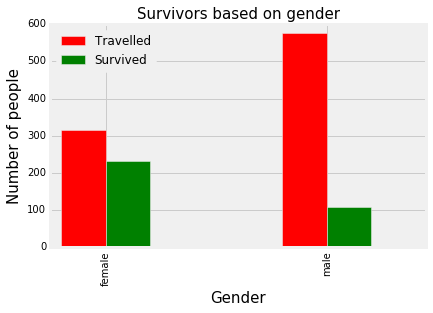

In [4]:
fsz = 15
width = 0.2
ax = copy_df.groupby('Sex').count()['Survived'].plot(kind = 'bar',position = 1, color = 'r', width = width ,label = 'Travelled')
ax = survived_df.groupby('Sex').count()['Survived'].plot(ax = ax,kind = 'bar',position = 0, color = 'g', width = width, label = 'Survived' )
ax.set_title('Survivors based on gender', fontsize = fsz)

ax.set_ylabel('Number of people',fontsize = fsz)
ax.set_xlabel('Gender',fontsize = fsz)

ax.legend(loc='upper left')

fig = ax.get_figure()
fig.savefig('survive-by-gender.png',transparent=True, bbox_inches='tight', pad_inches=1)



In [5]:
#Fill embarked missing values
copy_df[copy_df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


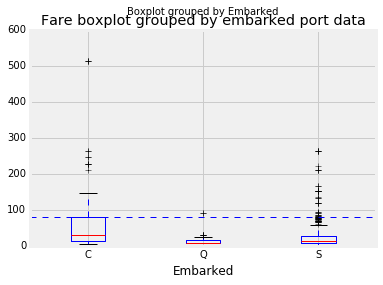

In [15]:
#Since passengers with missing Embarked field have fare of 80. We can fill the embarked with C.
ax = copy_df.boxplot(by = 'Embarked',column = 'Fare')
ax.axhline(80,linestyle='--', lw = 1)
copy_df["Embarked"] = copy_df["Embarked"].fillna("C")
ax.set_title('Fare boxplot grouped by embarked port data')
fig = ax.get_figure()
fig.savefig('embarked-and-fare.png',transparent=True, bbox_inches='tight', pad_inches=1)

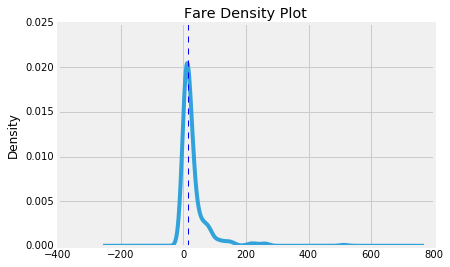

In [14]:
# Fill missing values for fare
ax = copy_df['Fare'].plot.kde(label = 'Fare',alpha=2 )
ax.axvline(copy_df['Fare'].median(),linestyle='--', lw = 1)

copy_df['Fare'].median()
ax.set_title('Fare Density Plot')


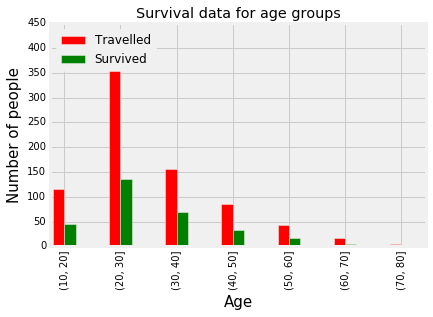

In [13]:
# copy_df.groupby((pd.cut(df.Age, 10), 'Age')).plot(column = 'Survived')
bins = [10,20,30,40,50,60,70,80]
ax = copy_df.groupby((pd.cut(copy_df.Age, bins)))['Survived'].count().plot(kind = 'bar', label = 'Travelled', position = 1, color = 'r',width=width)
survived_df.groupby((pd.cut(survived_df.Age, bins)))['Survived'].count().plot(ax = ax, kind = 'bar', label = 'Survived', position = 0, color = 'g',width=width)
ax.set_ylabel('Number of people',fontsize = fsz)
ax.set_xlabel('Age',fontsize = fsz)

ax.legend(loc='upper left')
ax.set_title('Survival data for age groups')

fig = ax.get_figure()
fig.savefig('survive-by-age.png',transparent=True, bbox_inches='tight')

In [9]:
#Use Decision Trees to Classify the test data
from sklearn.ensemble import RandomForestClassifier
X_train = copy_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis=1) 

X_train.Sex[X_train.Sex == 'male'] = 1
X_train.Sex[X_train.Sex == 'female'] = 0
Y_train = copy_df["Survived"]
X_test  = df_test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
X_test['Age'] = copy_df['Age'].fillna(copy_df.Age.mean())
X_test['Fare'] = copy_df['Fare'].fillna(copy_df.Age.median())
X_test.Sex[X_test.Sex == 'male'] = 1
X_test.Sex[X_test.Sex == 'female'] = 0

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

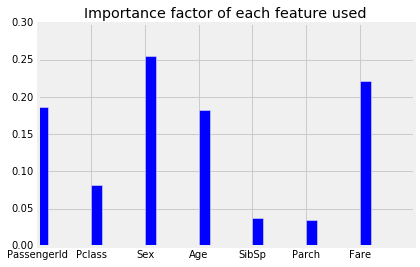

In [12]:
clf = RandomForestClassifier(n_jobs=100)
clf.fit(X_train, Y_train)

fig, ax = plt.subplots()
x_label = list(X_test.columns.values)
ax.bar(range(len(clf.feature_importances_)), clf.feature_importances_, width = width)
ax.set_xticklabels(x_label)
ax.set_title('Importance factor of each feature used')
fig = ax.get_figure()
fig.savefig('feature-importance.png',transparent=True, bbox_inches='tight', pad_inches=1)



In [16]:
pred = pd.DataFrame()
pred['PassengerId'] = X_test['PassengerId']
pred['Survived'] = clf.predict(X_test)
pred.to_csv('submission_random_forest.csv', index = False)

print 'Got 70.33% accuracy using Random Forest Classifier'

Got 70.33% accuracy using Random Forest Classifier


In [139]:
# n_estimators = 100
# clf_n = RandomForestClassifier(n_estimators=100,warm_start=True, oob_score=True)


# for i in range(1, n_estimators + 1):
#     clf_n.set_params(n_estimators=i)
#     clf_n.fit(X_train, Y_train)
    